In [ ]:
import pandas as pd
import socceraction.spadl as spadl
import matplotsoccer as mps

In [ ]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [ ]:
import scipy
import numpy as np

# [CDAF] Atividade 3

## Nome e matrícula
Nome: Igor Lacerda Faria da Silva
Matrícula: 2020049173

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [ ]:
PATH_DF = "data/events/events_Italy.json"

In [ ]:
df = pd.read_json(PATH_DF)

In [1]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647372 entries, 0 to 647371
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       647372 non-null  int64  
 1   subEventName  647372 non-null  object 
 2   tags          647372 non-null  object 
 3   playerId      647372 non-null  int64  
 4   positions     647372 non-null  object 
 5   matchId       647372 non-null  int64  
 6   eventName     647372 non-null  object 
 7   teamId        647372 non-null  int64  
 8   matchPeriod   647372 non-null  object 
 9   eventSec      647372 non-null  float64
 10  subEventId    647372 non-null  object 
 11  id            647372 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 59.3+ MB


In [2]:
df.head()

   eventId           subEventName  ... subEventId         id
0        8            Simple pass  ...         85  180423957
1        8            Simple pass  ...         85  180423958
2        7                  Touch  ...         72  180423959
3        1  Ground attacking duel  ...         11  180423960
4        1  Ground attacking duel  ...         11  180423961

[5 rows x 12 columns]

In [3]:
df["matchId"].unique()

array([2575959, 2575960, 2575961, 2575962, 2575963, 2575964, 2575965,
       2575966, 2575967, 2575968, 2575969, 2575970, 2575971, 2575972,
       2575973, 2575974, 2575975, 2575976, 2575977, 2575978, 2575979,
       2575980, 2575981, 2575982, 2575983, 2575984, 2575985, 2575986,
       2575987, 2575988, 2575989, 2575990, 2575991, 2575992, 2575993,
       2575994, 2575995, 2575996, 2575997, 2575998, 2575999, 2576000,
       2576001, 2576002, 2576003, 2576004, 2576005, 2576006, 2576007,
       2576008, 2576009, 2576010, 2576011, 2576012, 2576013, 2576014,
       2576015, 2576016, 2576017, 2576018, 2576019, 2576020, 2576021,
       2576022, 2576023, 2576024, 2576025, 2576026, 2576027, 2576028,
       2576029, 2576030, 2576031, 2576032, 2576033, 2576034, 2576035,
       2576036, 2576037, 2576038, 2576039, 2576040, 2576041, 2576042,
       2576043, 2576044, 2576045, 2576046, 2576047, 2576048, 2576049,
       2576050, 2576051, 2576052, 2576053, 2576054, 2576055, 2576056,
       2576057, 2576

In [ ]:
MATCH_ID = 2575959
df_match = df.query("matchId == @MATCH_ID")

In [4]:
df_match.head()

   eventId           subEventName  ... subEventId         id
0        8            Simple pass  ...         85  180423957
1        8            Simple pass  ...         85  180423958
2        7                  Touch  ...         72  180423959
3        1  Ground attacking duel  ...         11  180423960
4        1  Ground attacking duel  ...         11  180423961

[5 rows x 12 columns]

In [ ]:
correct_columns = {
    "eventId": "type_id",
    "subEventName": "subtype_name",
    "playerId": "player_id",
    "matchId": "game_id",
    "eventName": "type_name",
    "teamId": "team_id",
    "eventSec": "milliseconds",
    "subEventId": "subtype_id",
    "id": "event_id",
}
df_match = df_match.rename(columns=correct_columns)
df_match["period_id"] = pd.factorize(df_match["matchPeriod"])[0] + 1

In [5]:
df_match.head()

   type_id           subtype_name  ...   event_id  period_id
0        8            Simple pass  ...  180423957          1
1        8            Simple pass  ...  180423958          1
2        7                  Touch  ...  180423959          1
3        1  Ground attacking duel  ...  180423960          1
4        1  Ground attacking duel  ...  180423961          1

[5 rows x 13 columns]

In [6]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 1612
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type_id       1613 non-null   int64  
 1   subtype_name  1613 non-null   object 
 2   tags          1613 non-null   object 
 3   player_id     1613 non-null   int64  
 4   positions     1613 non-null   object 
 5   game_id       1613 non-null   int64  
 6   type_name     1613 non-null   object 
 7   team_id       1613 non-null   int64  
 8   matchPeriod   1613 non-null   object 
 9   milliseconds  1613 non-null   float64
 10  subtype_id    1613 non-null   object 
 11  event_id      1613 non-null   int64  
 12  period_id     1613 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 176.4+ KB


In [ ]:
TEAM_ID = 3158
OTHER_TEAM_ID = 3172

In [ ]:
df_spadl = spadl.wyscout.convert_to_actions(df_match, TEAM_ID)

In [7]:
df_spadl

      game_id  period_id  time_seconds  team_id  ...  bodypart_id  type_id  result_id  action_id
0     2575959          1      0.002531     3158  ...            0        0          1          0
1     2575959          1      0.003768     3158  ...            0        0          1          1
2     2575959          1      0.005942     3158  ...            0       21          1          2
3     2575959          1      0.008115     3158  ...            0        7          1          3
4     2575959          1      0.008648     3158  ...            0        7          1          4
...       ...        ...           ...      ...  ...          ...      ...        ...        ...
1217  2575959          2      2.980286     3158  ...            0        0          1       1217
1218  2575959          2      2.983099     3158  ...            0        0          0       1218
1219  2575959          2      2.987436     3172  ...            0        0          1       1219
1220  2575959          2      

## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

In [8]:
df_spadl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            1222 non-null   int64  
 1   period_id          1222 non-null   int64  
 2   time_seconds       1222 non-null   float64
 3   team_id            1222 non-null   int64  
 4   player_id          1222 non-null   int64  
 5   start_x            1222 non-null   float64
 6   start_y            1222 non-null   float64
 7   end_x              1222 non-null   float64
 8   end_y              1222 non-null   float64
 9   original_event_id  1125 non-null   object 
 10  bodypart_id        1222 non-null   int64  
 11  type_id            1222 non-null   int64  
 12  result_id          1222 non-null   int64  
 13  action_id          1222 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 133.8+ KB


In [9]:
df_spadl.head(10)

   game_id  period_id  time_seconds  team_id  ...  bodypart_id  type_id  result_id  action_id
0  2575959          1      0.002531     3158  ...            0        0          1          0
1  2575959          1      0.003768     3158  ...            0        0          1          1
2  2575959          1      0.005942     3158  ...            0       21          1          2
3  2575959          1      0.008115     3158  ...            0        7          1          3
4  2575959          1      0.008648     3158  ...            0        7          1          4
5  2575959          1      0.010376     3158  ...            0        0          1          5
6  2575959          1      0.016241     3172  ...            0        0          1          6
7  2575959          1      0.019153     3158  ...            0        0          1          7
8  2575959          1      0.020873     3158  ...            0        0          1          8
9  2575959          1      0.021504     3158  ...           

In [ ]:
df_spadl = spadl.add_names(df_spadl)

In [10]:
df_spadl["type_name"].unique()

array(['pass', 'dribble', 'take_on', 'foul', 'freekick_short', 'cross',
       'goalkick', 'clearance', 'throw_in', 'interception', 'shot',
       'keeper_save', 'tackle', 'corner_short', 'corner_crossed',
       'shot_freekick', 'freekick_crossed'], dtype=object)

In [11]:
# Acho que essa partida não teve gols
df_spadl.query("type_name == 'keeper_save'")

      game_id  period_id  time_seconds  ...    type_name  result_name  bodypart_name
44    2575959          1      0.195926  ...  keeper_save      success          other
341   2575959          1      1.463548  ...  keeper_save      success          other
544   2575959          1      2.485311  ...  keeper_save      success          other
646   2575959          2      0.188729  ...  keeper_save      success          other
928   2575959          2      1.480676  ...  keeper_save      success          other
1063  2575959          2      2.180659  ...  keeper_save      success          other

[6 rows x 17 columns]

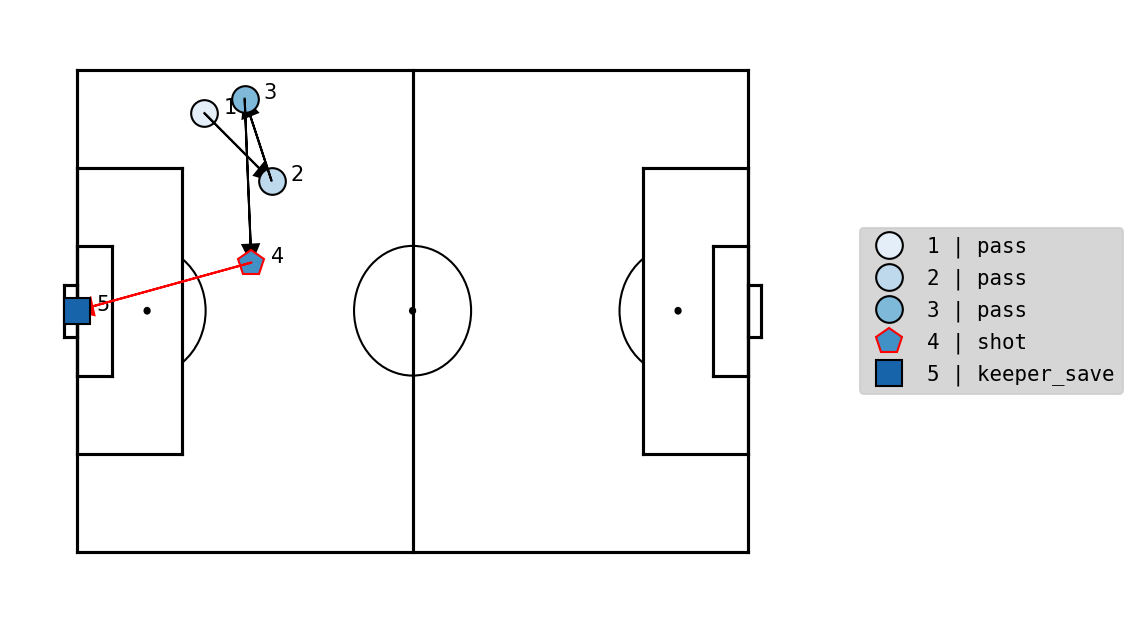

In [12]:
df_action_sequence = df_spadl.loc[337:341]
df_action_sequence = spadl.add_names(df_action_sequence)
mps.actions(
    location=df_action_sequence[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_action_sequence.type_name,
    result=df_action_sequence.result_name == "success",
    zoom=False,
)

## Questão 3
- Visualize os chutes da partida, desenvolvendo seu código em cima do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time as melhores chances da partida? Por quê?

In [ ]:
shot_list = ["shot", "shot_freekick", "shot_penalty"]

In [ ]:
df_shot = df_spadl.query("type_name in @shot_list")

In [13]:
df_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 43 to 1215
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            24 non-null     int64  
 1   period_id          24 non-null     int64  
 2   time_seconds       24 non-null     float64
 3   team_id            24 non-null     int64  
 4   player_id          24 non-null     int64  
 5   start_x            24 non-null     float64
 6   start_y            24 non-null     float64
 7   end_x              24 non-null     float64
 8   end_y              24 non-null     float64
 9   original_event_id  24 non-null     object 
 10  bodypart_id        24 non-null     int64  
 11  type_id            24 non-null     int64  
 12  result_id          24 non-null     int64  
 13  action_id          24 non-null     int64  
 14  type_name          24 non-null     object 
 15  result_name        24 non-null     object 
 16  bodypart_name      24 non

In [14]:
df_shot.head()

     game_id  period_id  time_seconds  team_id  ...  action_id  type_name  result_name  bodypart_name
43   2575959          1      0.193924     3172  ...         43       shot         fail           foot
64   2575959          1      0.250843     3158  ...         64       shot         fail           foot
153  2575959          1      0.633578     3158  ...        153       shot         fail           foot
318  2575959          1      1.359469     3158  ...        318       shot         fail           foot
328  2575959          1      1.412602     3172  ...        328       shot         fail           foot

[5 rows x 17 columns]

In [ ]:
def print_shots(shots: pd.DataFrame, id_team: str):
    pitch = Pitch(line_color="black")
    fig, ax = pitch.draw(figsize=(10, 7))
    # Plot the shots by looping through them.
    for _, shot in shots.iterrows():
        # get the information
        x = shot["start_x"]
        y = shot["start_y"]
        goal = shot["result_name"] == "success"
        # set circlesize
        circleSize = 2
        # plot first team
        if shot["team_id"] == id_team:
            if goal:
                shotCircle = plt.Circle((x, y), circleSize, color="red")
                plt.text(x + 1, y - 2, shot["player_id"])
            else:
                shotCircle = plt.Circle((x, y), circleSize, color="red")
                shotCircle.set_alpha(0.2)
            ax.add_patch(shotCircle)
    # set title
    fig.suptitle(f"{id_team} shots", color="white")
    fig.set_size_inches(10, 7)
    plt.show()

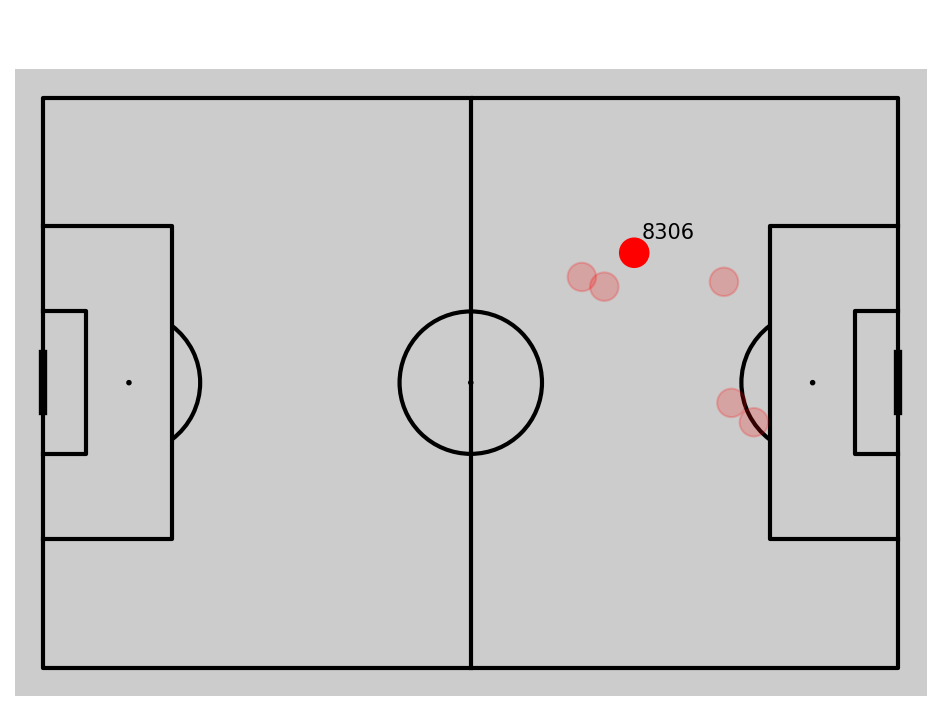

In [15]:
print_shots(df_shot, TEAM_ID)

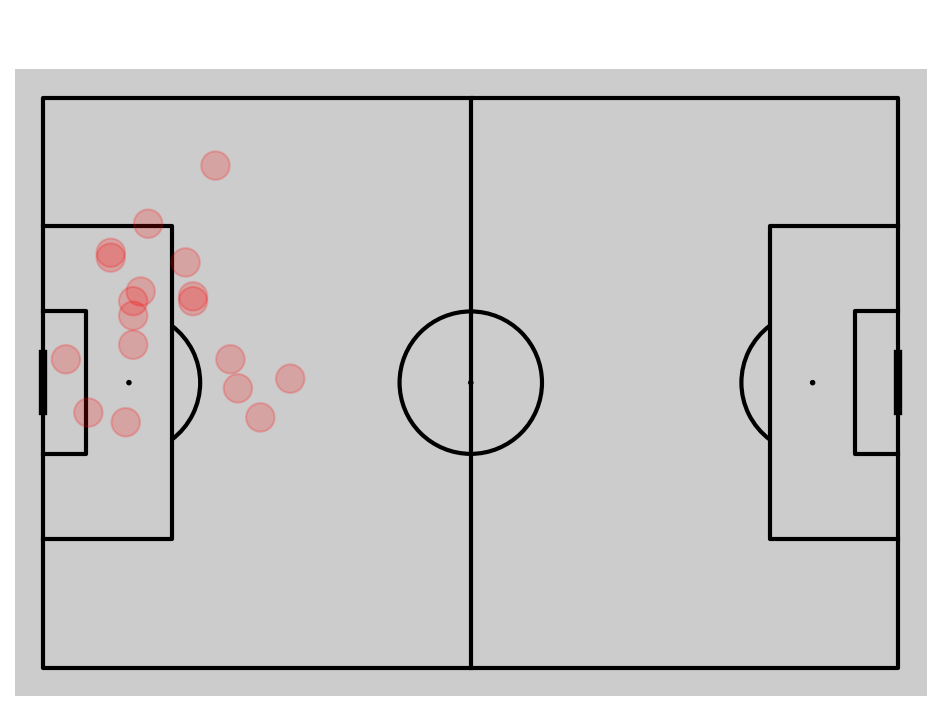

In [16]:
print_shots(df_shot, OTHER_TEAM_ID)

### Análise

O time 3172 (não sei quem é) teve ótimas oportunidades, mas errou todas suas chances. Por outro lado, o time 3158, mesmo tendo menos chances, conseguiu acertar um gol bem mais de longe e com menos tentativas, parabéns pra eles.

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? O comportamento dele varia muito do ataque para a defesa?

In [17]:
df_spadl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            1222 non-null   int64  
 1   period_id          1222 non-null   int64  
 2   time_seconds       1222 non-null   float64
 3   team_id            1222 non-null   int64  
 4   player_id          1222 non-null   int64  
 5   start_x            1222 non-null   float64
 6   start_y            1222 non-null   float64
 7   end_x              1222 non-null   float64
 8   end_y              1222 non-null   float64
 9   original_event_id  1125 non-null   object 
 10  bodypart_id        1222 non-null   int64  
 11  type_id            1222 non-null   int64  
 12  result_id          1222 non-null   int64  
 13  action_id          1222 non-null   int64  
 14  type_name          1222 non-null   object 
 15  result_name        1222 non-null   object 
 16  bodypart_name      1222 

In [18]:
df_spadl["player_id"].unique()

array([  8327,  20438,   8306,  86366,  20518,   3475,  50849, 295176,
        21077,  49991,  92966,  20841,  41034,  20404, 214220,    114,
        23149,  44251,  20879,      0, 280419, 246175,  21620, 135150,
        20820,    625,   3463,  20418])

In [ ]:
PLAYER_ID = 8327

In [ ]:
df_player = df_spadl.query(f"player_id == {PLAYER_ID}")

In [19]:
df_player.head()

    game_id  period_id  time_seconds  team_id  ...  action_id  type_name  result_name  bodypart_name
0   2575959          1      0.002531     3158  ...          0       pass      success           foot
54  2575959          1      0.216335     3158  ...         54    dribble      success           foot
55  2575959          1      0.218884     3158  ...         55       pass         fail           foot
58  2575959          1      0.237519     3158  ...         58       pass      success           foot
64  2575959          1      0.250843     3158  ...         64       shot         fail           foot

[5 rows x 17 columns]

In [ ]:
df_player = spadl.add_names(df_player)

In [20]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 1218
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            37 non-null     int64  
 1   period_id          37 non-null     int64  
 2   time_seconds       37 non-null     float64
 3   team_id            37 non-null     int64  
 4   player_id          37 non-null     int64  
 5   start_x            37 non-null     float64
 6   start_y            37 non-null     float64
 7   end_x              37 non-null     float64
 8   end_y              37 non-null     float64
 9   original_event_id  32 non-null     object 
 10  bodypart_id        37 non-null     int64  
 11  type_id            37 non-null     int64  
 12  result_id          37 non-null     int64  
 13  action_id          37 non-null     int64  
 14  type_name          37 non-null     object 
 15  result_name        37 non-null     object 
 16  bodypart_name      37 non-

In [21]:
df_player["type_name"].unique()

array(['pass', 'dribble', 'shot', 'take_on', 'interception', 'cross'],
      dtype=object)

In [ ]:
def heatmap(df: pd.DataFrame):
    x = df["start_x"]
    y = df["start_y"]
    hm = mps.count(x, y, n=25, m=25)  # Construct a 25x25 heatmap from x,y-coordinates
    hm = scipy.ndimage.gaussian_filter(hm, 1)
    mps.heatmap(hm)

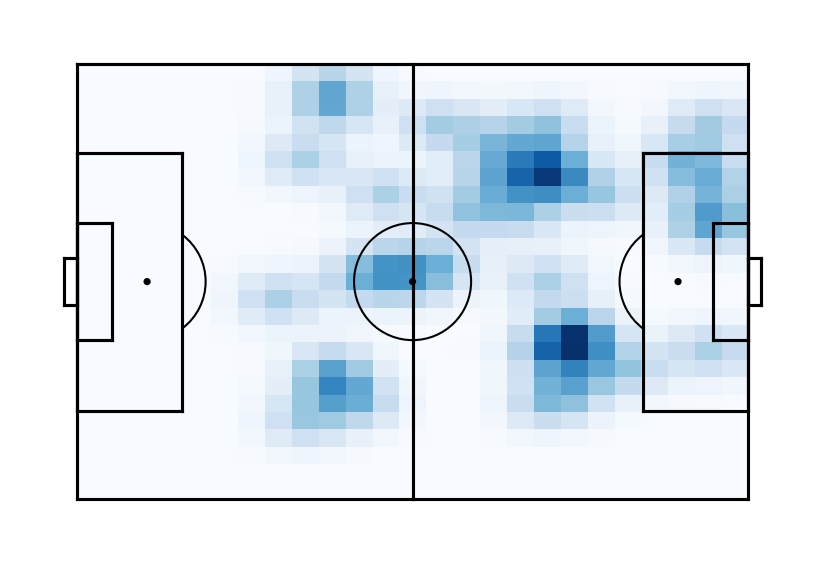

In [22]:
heatmap(df_player)

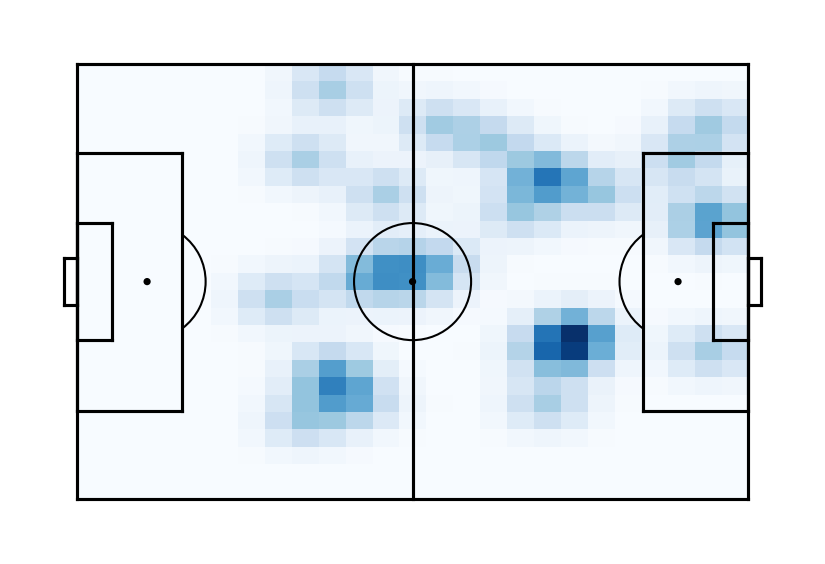

In [23]:
ATK_ACTION = [
    "pass",
    "cross",
    "throw_in",
    "freekick_crossed",
    "corner_crossed",
    "corner_short",
    "shot",
    "shot_penalty",
    "shot_freekick",
]

df_player_atk = df_player.query("type_name in @ATK_ACTION")
heatmap(df_player_atk)

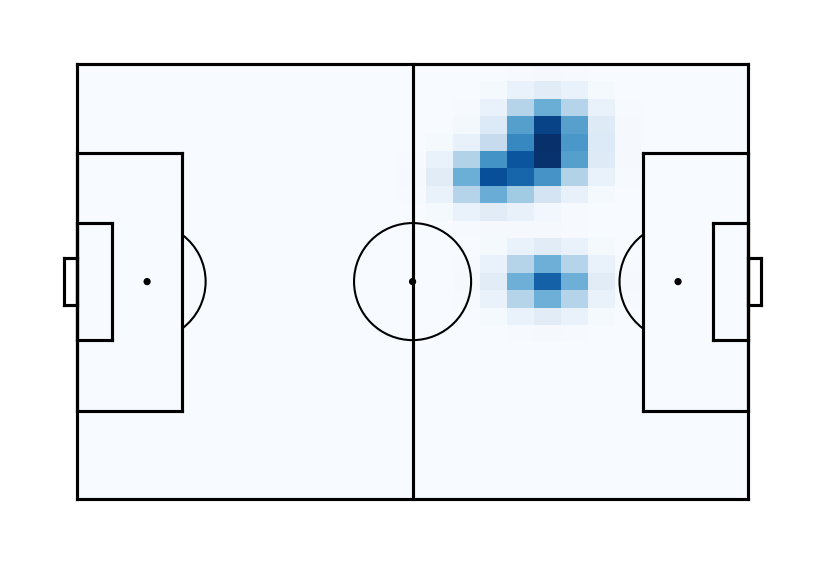

In [24]:
DEF_ACTION = [
    "take_on",
    "foul",
    "tackle",
    "interception",
    "keeper_save",
    "keeper_claim",
    "keeper_punch",
    "keeper_pick_up",
    "clearance",
]

df_player_def = df_player.query("type_name in @DEF_ACTION")
heatmap(df_player_def)

### Análise

Esse jogador tem o perfil mais voltado ao ataque, fazendo ações defensivas somente quando necessário, para continuar um ataque.

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

In [25]:
df_player["type_name"].unique()

array(['pass', 'dribble', 'shot', 'take_on', 'interception', 'cross'],
      dtype=object)

In [ ]:
pass_list = [
    "pass",
    "cross",
    "throw_in",
    "freekick_crossed",
    "freekick_short",
    "corner_crossed",
    "corner_short",
]

In [ ]:
df_player_pass = df_player.query("type_name in @pass_list")

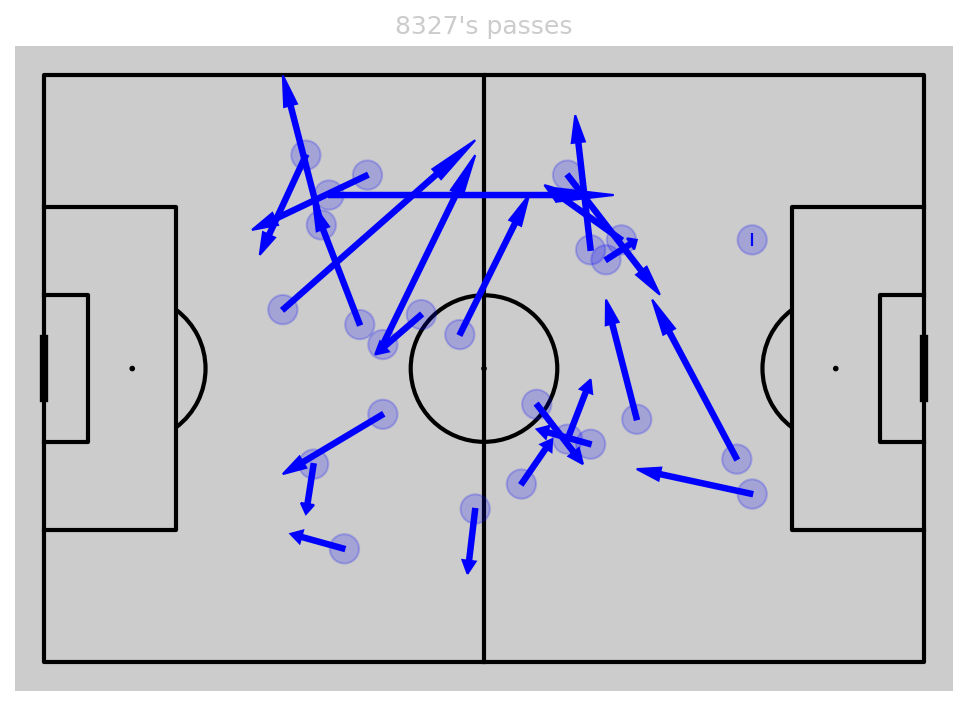

In [26]:
# drawing pitch
pitch = Pitch(line_color="black")
fig, ax = pitch.draw(figsize=(10, 7))

for _, thepass in df_player_pass.iterrows():
    x = thepass["start_x"]
    y = thepass["start_y"]
    # plot circle
    passCircle = plt.Circle((x, y), 2, color="blue")
    passCircle.set_alpha(0.2)
    ax.add_patch(passCircle)
    dx = thepass["end_x"] - x
    dy = thepass["end_y"] - y
    # plot arrow
    passArrow = plt.Arrow(x, y, dx, dy, width=3, color="blue")
    ax.add_patch(passArrow)

ax.set_title(f"{PLAYER_ID}'s passes")
fig.set_size_inches(10, 7)
plt.show()

### Análise

O mapa de passes revela que esse jogador não é tão ofensivo quanto previsto pelos mapas de calor na questão anterior, fazendo mais passes próximo do meio de campo.

## Questão 6
- Crie uma rede de passes de cada uma das equipes, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

In [27]:
df_spadl["type_name"].unique()

array(['pass', 'dribble', 'take_on', 'foul', 'freekick_short', 'cross',
       'goalkick', 'clearance', 'throw_in', 'interception', 'shot',
       'keeper_save', 'tackle', 'corner_short', 'corner_crossed',
       'shot_freekick', 'freekick_crossed'], dtype=object)

In [ ]:
pass_list = [
    "pass",
    "cross",
    "throw_in",
    "freekick_crossed",
    "freekick_short",
    "corner_crossed",
    "corner_short",
]

In [28]:
df_spadl.columns

Index(['game_id', 'period_id', 'time_seconds', 'team_id', 'player_id',
       'start_x', 'start_y', 'end_x', 'end_y', 'original_event_id',
       'bodypart_id', 'type_id', 'result_id', 'action_id', 'type_name',
       'result_name', 'bodypart_name'],
      dtype='object')

In [29]:
df_spadl.head()

   game_id  period_id  time_seconds  team_id  ...  action_id  type_name  result_name  bodypart_name
0  2575959          1      0.002531     3158  ...          0       pass      success           foot
1  2575959          1      0.003768     3158  ...          1       pass      success           foot
2  2575959          1      0.005942     3158  ...          2    dribble      success           foot
3  2575959          1      0.008115     3158  ...          3    take_on      success           foot
4  2575959          1      0.008648     3158  ...          4    take_on      success           foot

[5 rows x 17 columns]

In [ ]:
df_pass_home = df_spadl.query(
    "type_name in @pass_list and result_name == 'success' and team_id == @TEAM_ID"
).copy()

In [ ]:
df_pass_away = df_spadl.query(
    "type_name in @pass_list and result_name == 'success' and team_id == @OTHER_TEAM_ID"
).copy()

In [ ]:
def define_recipient(df: pd.DataFrame):
    df["recipient_id"] = df["player_id"].shift(-1, fill_value=0).astype(int)

In [ ]:
define_recipient(df_pass_home)

In [ ]:
define_recipient(df_pass_away)

In [ ]:
def get_scatter_df(df: pd.DataFrame) -> pd.DataFrame:
    scatter_df = pd.DataFrame()
    for i, id in enumerate(df["player_id"].unique()):
        passx = df.loc[df["player_id"] == id]["start_x"].to_numpy()
        recx = df.loc[df["recipient_id"] == id]["end_x"].to_numpy()
        passy = df.loc[df["player_id"] == id]["start_y"].to_numpy()
        recy = df.loc[df["recipient_id"] == id]["end_y"].to_numpy()
        scatter_df.at[i, "player_id"] = id
        # make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        # calculate number of passes
        scatter_df.at[i, "no"] = df.loc[df["player_id"] == id].count().iloc[0]

    # adjust the size of a circle so that the player who made more passes
    scatter_df["marker_size"] = scatter_df["no"] / scatter_df["no"].max() * 1500
    return scatter_df

In [ ]:
scatter_df_home = get_scatter_df(df_pass_home)

In [ ]:
scatter_df_away = get_scatter_df(df_pass_away)

In [ ]:
def define_pairs(df: pd.DataFrame):
    df["pair_key"] = df.apply(
        lambda x: "_".join(sorted([str(x["player_id"]), str(x["recipient_id"])])),
        axis=1,
    )

In [ ]:
define_pairs(df_pass_home)

In [ ]:
define_pairs(df_pass_away)

In [ ]:
def get_lines_df(df: pd.DataFrame):
    lines_df = df.groupby(["pair_key"]).start_x.count().reset_index()
    lines_df.rename({"start_x": "pass_count"}, axis="columns", inplace=True)
    # setting a treshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df["pass_count"] > 2]
    return lines_df

In [ ]:
lines_df_home = get_lines_df(df_pass_home)

In [ ]:
lines_df_away = get_lines_df(df_pass_away)

In [ ]:
def plot_nodes(scatter_df: pd.DataFrame):
    # Drawing pitch
    pitch = Pitch(line_color="grey")
    fig, ax = pitch.grid(
        grid_height=0.9,
        title_height=0.06,
        axis=False,
        endnote_height=0.04,
        title_space=0,
        endnote_space=0,
    )
    # Scatter the location on the pitch
    pitch.scatter(
        scatter_df.x,
        scatter_df.y,
        s=scatter_df.marker_size,
        color="red",
        edgecolors="grey",
        linewidth=1,
        alpha=1,
        ax=ax["pitch"],
        zorder=3,
    )
    # annotating player name
    for i, row in scatter_df.iterrows():
        pitch.annotate(
            row.player_id,
            xy=(row.x, row.y),
            c="black",
            va="center",
            ha="center",
            weight="bold",
            ax=ax["pitch"],
            zorder=4,
        )

    fig.suptitle("Nodes Locations", color="white")
    plt.show()

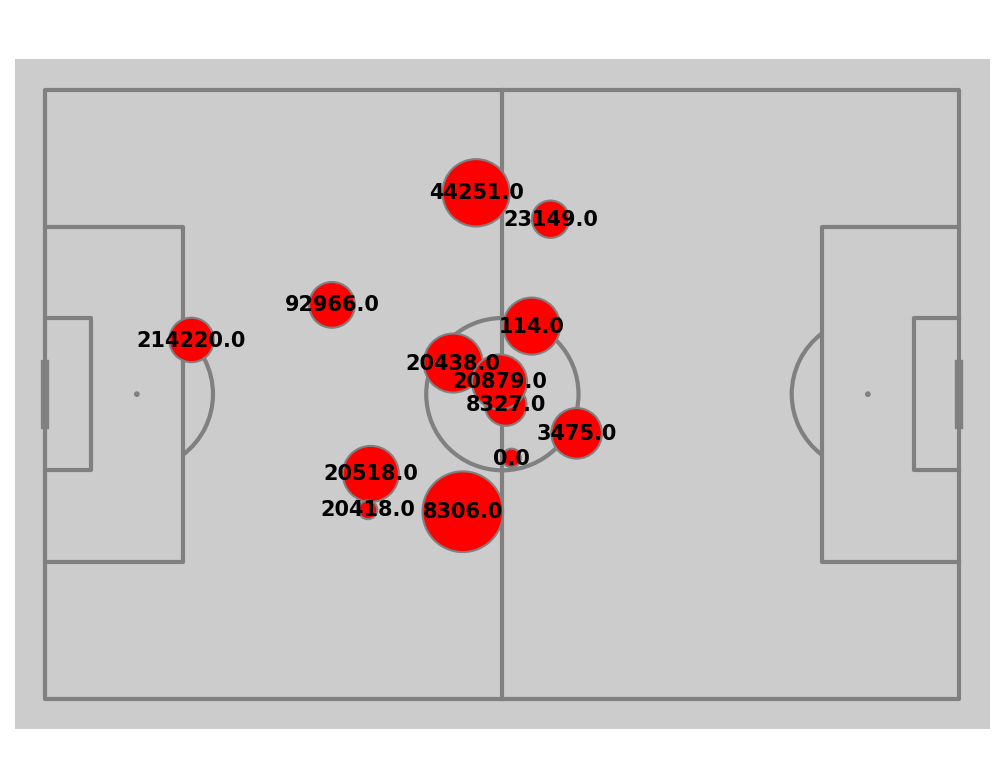

In [30]:
plot_nodes(scatter_df_home)

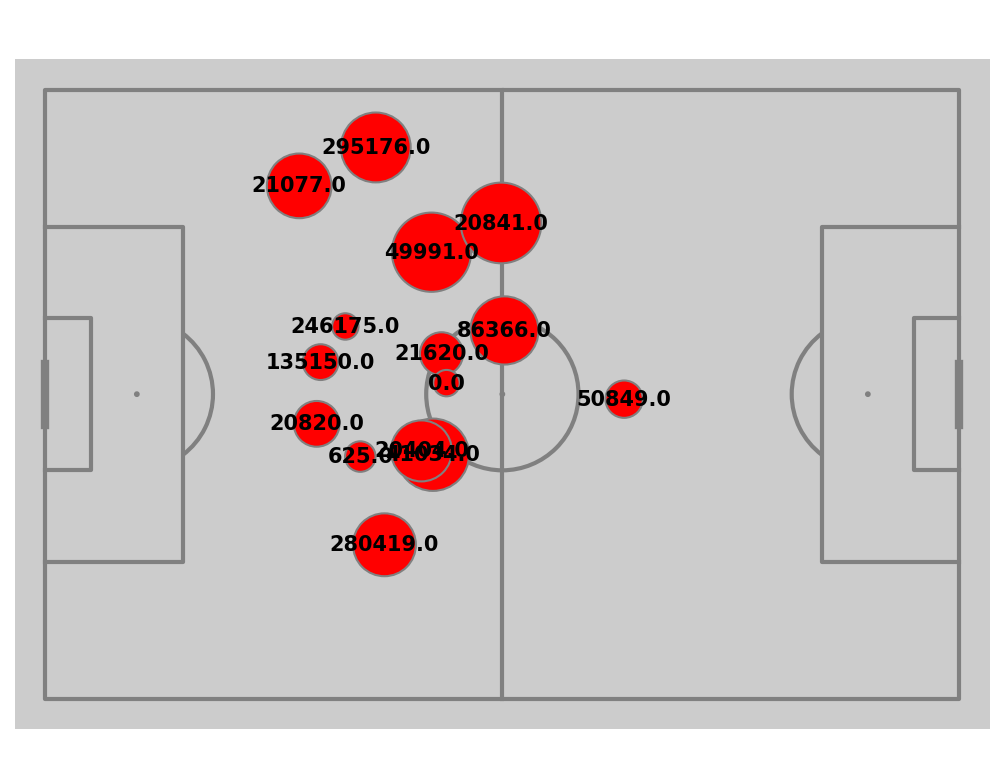

In [31]:
plot_nodes(scatter_df_away)

In [ ]:
def passing_netwrok(scatter_df: pd.DataFrame, lines_df: pd.DataFrame, team_id: str):
    # plot once again pitch and vertices
    pitch = Pitch(line_color="grey")
    fig, ax = pitch.grid(
        grid_height=0.9,
        title_height=0.06,
        axis=False,
        endnote_height=0.04,
        title_space=0,
        endnote_space=0,
    )
    pitch.scatter(
        scatter_df.x,
        scatter_df.y,
        s=scatter_df.marker_size,
        color="red",
        edgecolors="grey",
        linewidth=1,
        alpha=1,
        ax=ax["pitch"],
        zorder=3,
    )
    for i, row in scatter_df.iterrows():
        pitch.annotate(
            int(row.player_id),
            xy=(row.x, row.y),
            c="black",
            va="center",
            ha="center",
            weight="bold",
            ax=ax["pitch"],
            zorder=4,
        )

    for i, row in lines_df.iterrows():
        player1 = int(row["pair_key"].split("_")[0])
        player2 = int(row["pair_key"].split("_")[1])
        # take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_id"] == player1]["x"]
        player1_y = scatter_df.loc[scatter_df["player_id"] == player1]["y"].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_id"] == player2]["x"].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_id"] == player2]["y"].iloc[0]
        num_passes = row["pass_count"]
        # adjust the line width so that the more passes, the wider the line
        line_width = num_passes / lines_df["pass_count"].max() * 10
        # plot lines on the pitch
        pitch.lines(
            player1_x,
            player1_y,
            player2_x,
            player2_y,
            alpha=1,
            lw=line_width,
            zorder=2,
            color="red",
            ax=ax["pitch"],
        )

    fig.suptitle(f"Passing Network {team_id}", color="white")
    plt.show()

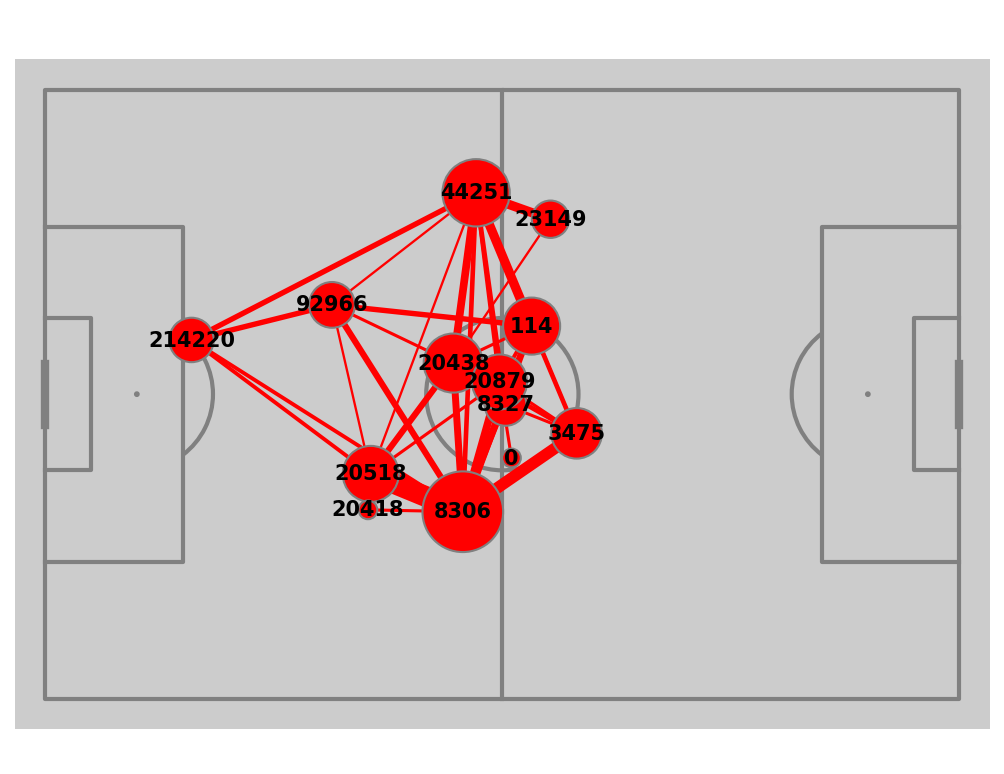

In [32]:
passing_netwrok(scatter_df_home, lines_df_home, TEAM_ID)

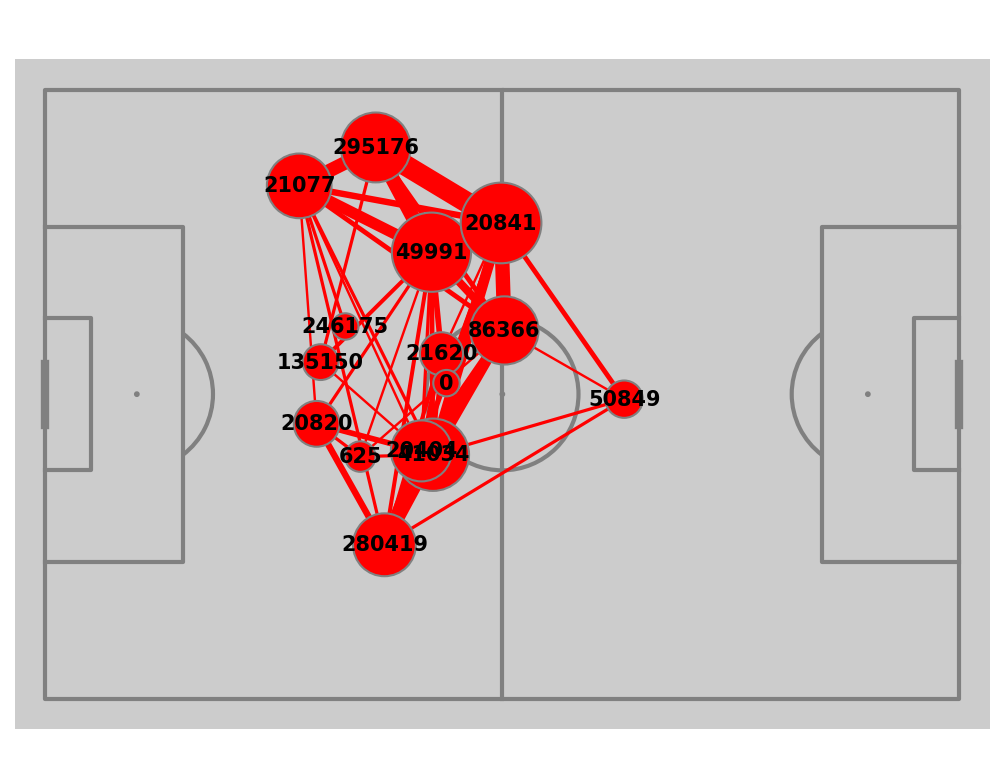

In [33]:
passing_netwrok(scatter_df_away, lines_df_away, OTHER_TEAM_ID)

- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

### Análise

O time 3158 faz menos passes, com os principais jogadores sendo o 20518 e o 8306 (que fez gol). Por outro lado, a rede do time 3172 é mais "difusa", no sentindo de "uma grande quantidade de jogadores troca muitos passes". Por outro lado, esses passes estão mais próximos do meio de campo, o que não é muito bacana em termos de ataque. Nessa equipe, os jogadores com maior grau foram o 20841, 280419, 295176, entre outros.